In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

def parse_drm_results(file_path):
    """Parses the file with results and returns a DataFrame."""
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Match rank and loss
            rank_match = re.match(r"Rank (\d+), loss = ([\-\d\.eE]+)", line)
            if rank_match:
                rank = int(rank_match.group(1))
                loss_str = rank_match.group(2)
                if loss_str.lower() == 'inf':  # Handle 'inf' case
                    loss = np.inf
                else:
                    loss = float(loss_str)
                data.append({"Rank": rank, "Loss": loss})
            # Match hyperparameters
            act_fn_match = re.match(r"\s+act_fn: (.+)", line)
            width_match = re.match(r"\s+width: (\d+)", line)
            n_blocks_match = re.match(r"\s+n_blocks: (\d+)", line)
            lr_match = re.match(r"\s+lr: ([\d\.eE\-]+)", line)

            if act_fn_match:
                data[-1]["ActFn"] = act_fn_match.group(1)
            if width_match:
                data[-1]["Width"] = int(width_match.group(1))
            if n_blocks_match:
                data[-1]["NBlocks"] = int(n_blocks_match.group(1))
            if lr_match:
                data[-1]["LR"] = float(lr_match.group(1))

    return pd.DataFrame(data)

In [17]:
def parse_pinn_results(file_path):
    """Parses the file with results and returns a DataFrame."""
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Match rank and loss
            rank_match = re.match(r"Rank (\d+), loss = ([\-\d\.eEinf\+]+)", line)
            if rank_match:
                rank = int(rank_match.group(1))
                loss_str = rank_match.group(2)
                if "inf" in loss_str.lower():  # Handle 'inf' case
                    loss = np.inf
                else:
                    loss = float(loss_str)
                data.append({"Rank": rank, "Loss": loss})
            # Match hyperparameters
            act_fn_match = re.match(r"\s+act_fn: (.+)", line)
            width_match = re.match(r"\s+width: (\d+)", line)
            depth_match = re.match(r"\s+depth: (\d+)", line)
            lr_match = re.match(r"\s+lr: ([\d\.eE\-]+)", line)
            
            if act_fn_match:
                data[-1]["ActFn"] = act_fn_match.group(1)
            if width_match:
                data[-1]["Width"] = int(width_match.group(1))
            if depth_match:
                data[-1]["Depth"] = int(depth_match.group(1))
            if lr_match:
                data[-1]["LR"] = float(lr_match.group(1))
                
    return pd.DataFrame(data)

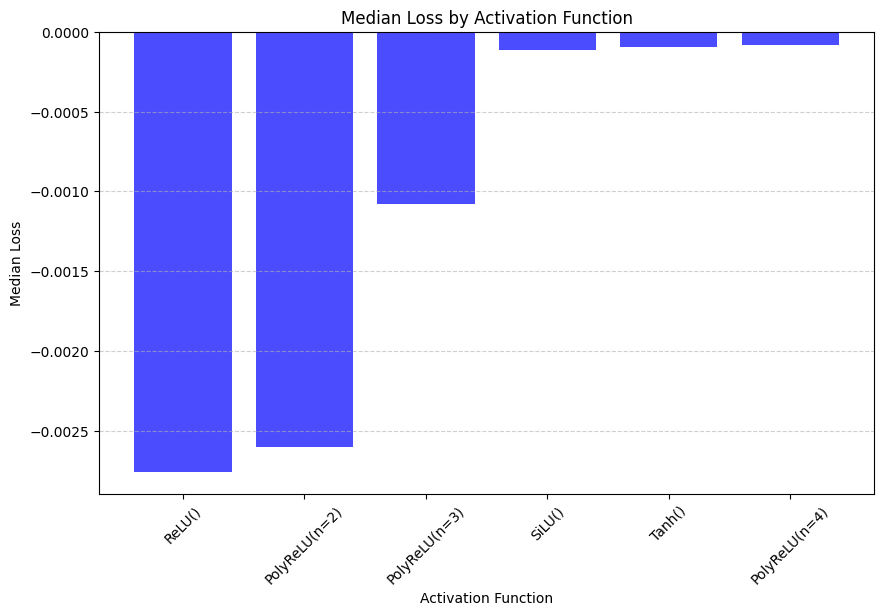

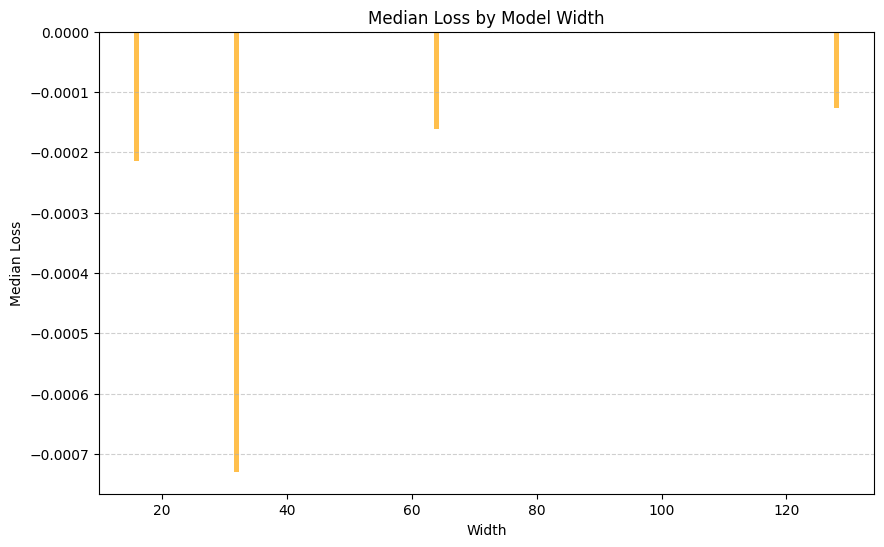

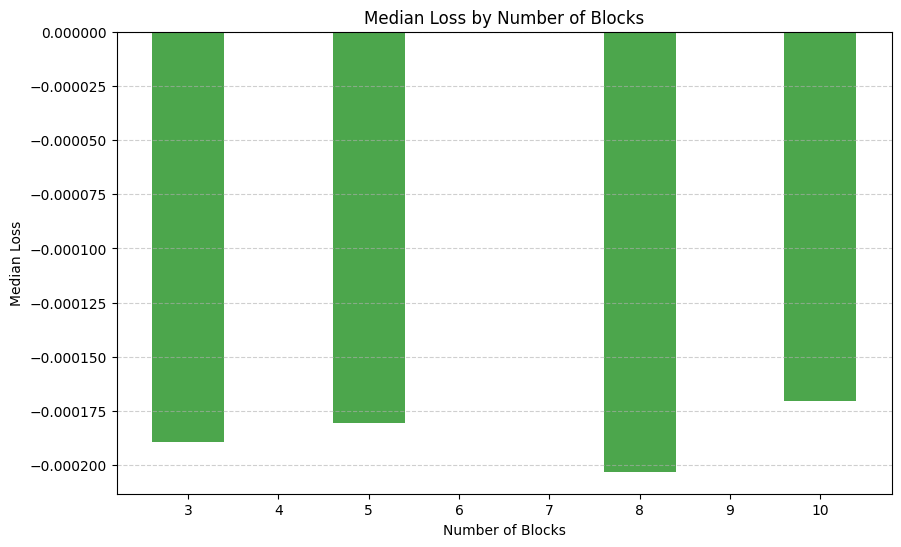

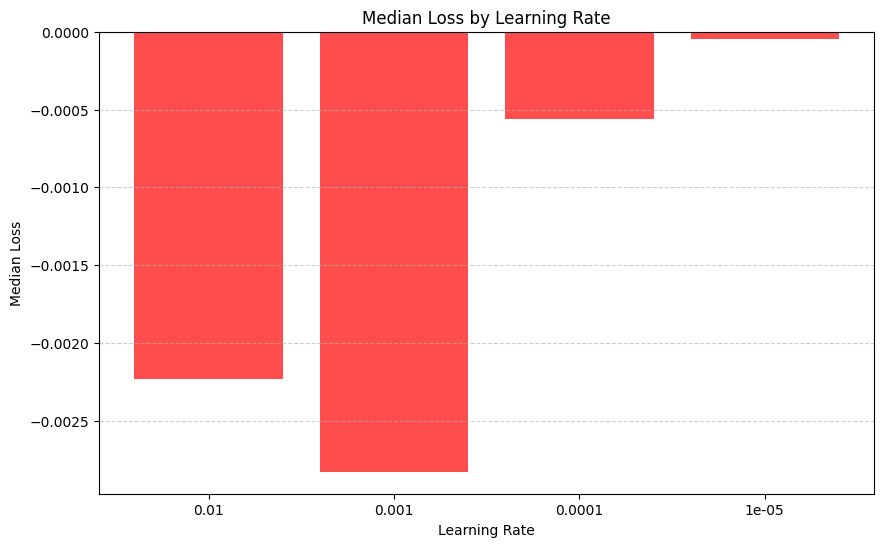

In [23]:
file_path = 'grid_search_results_drm_2d_laplacian.txt'
df = parse_drm_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("NBlocks")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Number of Blocks
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Number of Blocks")
plt.ylabel("Median Loss")
plt.xlabel("Number of Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()



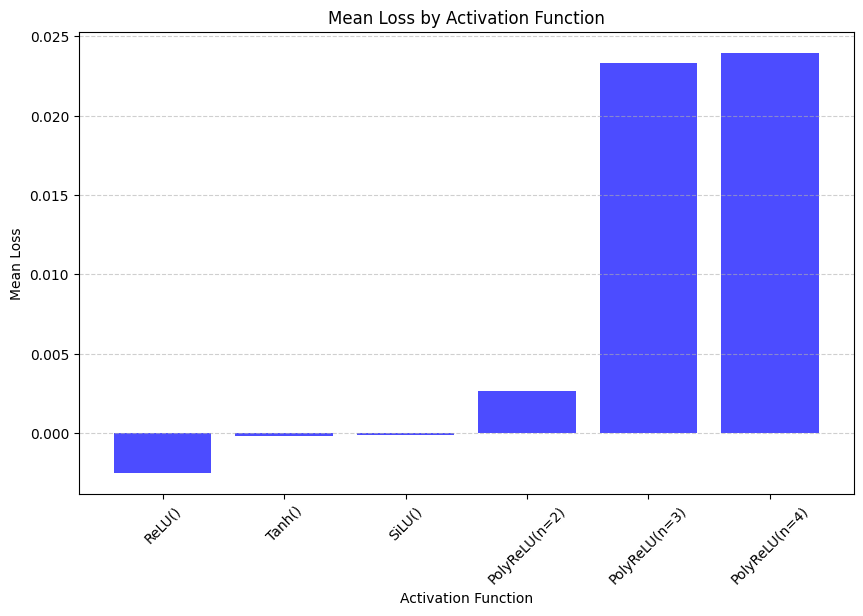

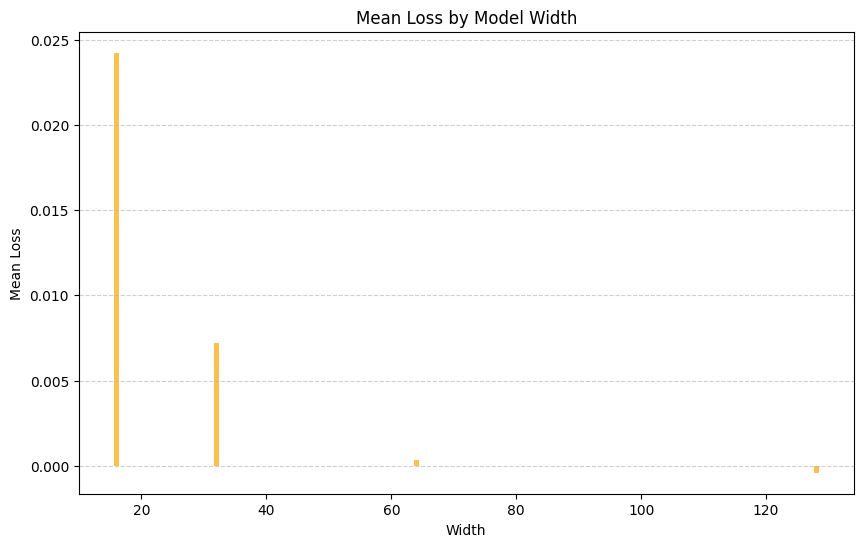

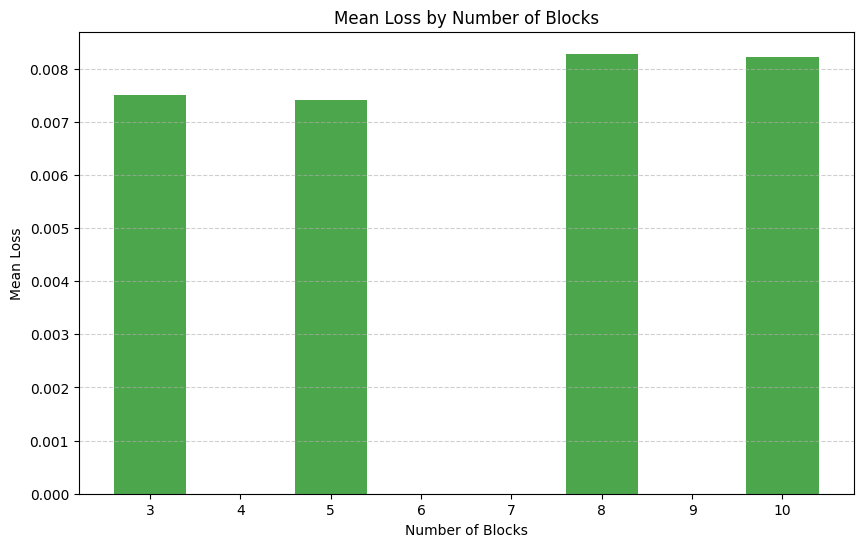

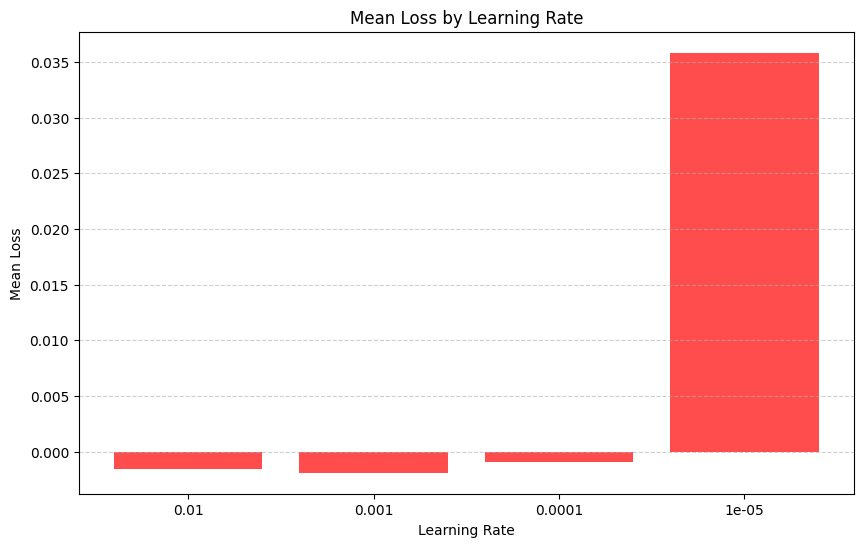

In [24]:
file_path = 'grid_search_results_drm_2d_laplacian.txt'
df = parse_drm_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_mean = df.groupby("ActFn")["Loss"].mean().sort_values()

# Group by width
width_mean = df.groupby("Width")["Loss"].mean().sort_index()

# Group by number of blocks
nblocks_mean = df.groupby("NBlocks")["Loss"].mean().sort_index()

# Group by learning rate
lr_mean = df.groupby("LR")["Loss"].mean().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_mean.index, act_fn_mean, color="blue", alpha=0.7)
plt.title("Mean Loss by Activation Function")
plt.ylabel("Mean Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_mean.index, width_mean, color="orange", alpha=0.7)
plt.title("Mean Loss by Model Width")
plt.ylabel("Mean Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Number of Blocks
plt.figure(figsize=(10, 6))
plt.bar(nblocks_mean.index, nblocks_mean, color="green", alpha=0.7)
plt.title("Mean Loss by Number of Blocks")
plt.ylabel("Mean Loss")
plt.xlabel("Number of Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_mean.index.astype(str), lr_mean, color="red", alpha=0.7)
plt.title("Mean Loss by Learning Rate")
plt.ylabel("Mean Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()



ActFn
SiLU()           1.798943e-08
Tanh()           1.258870e-07
ReLU()           4.978636e-07
PolyReLU(n=2)    7.411211e-04
PolyReLU(n=4)    5.596222e-03
PolyReLU(n=3)    7.691098e-03
Name: Loss, dtype: float64


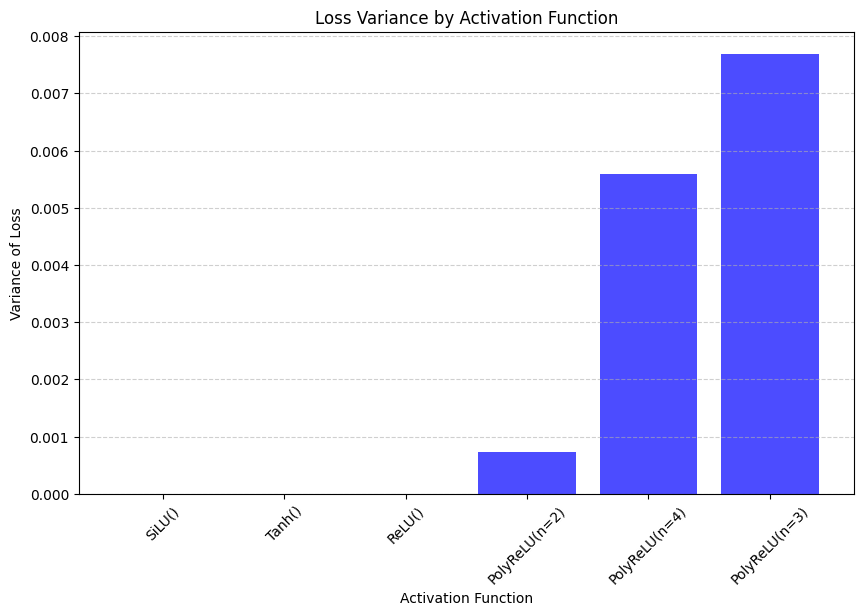

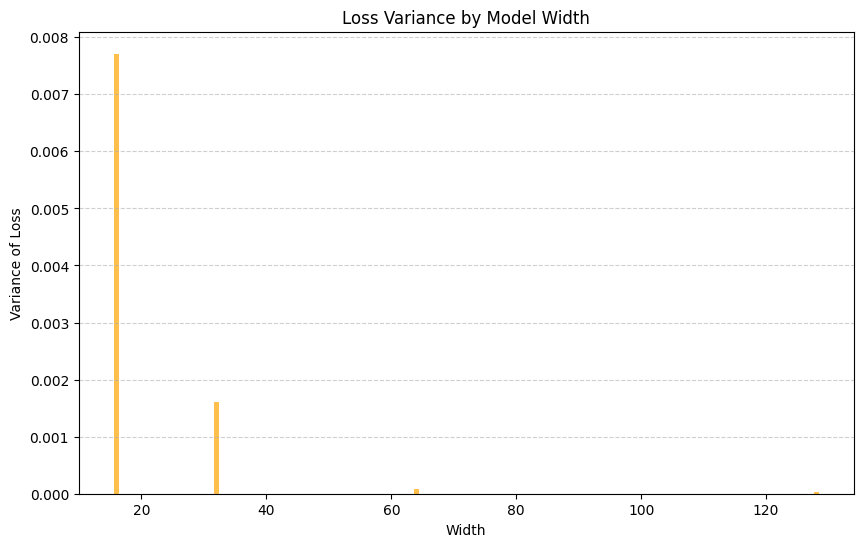

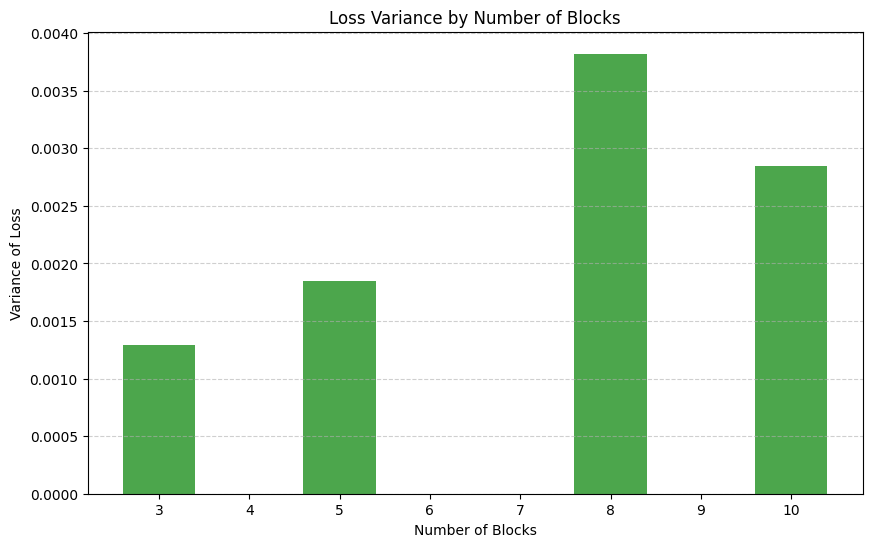

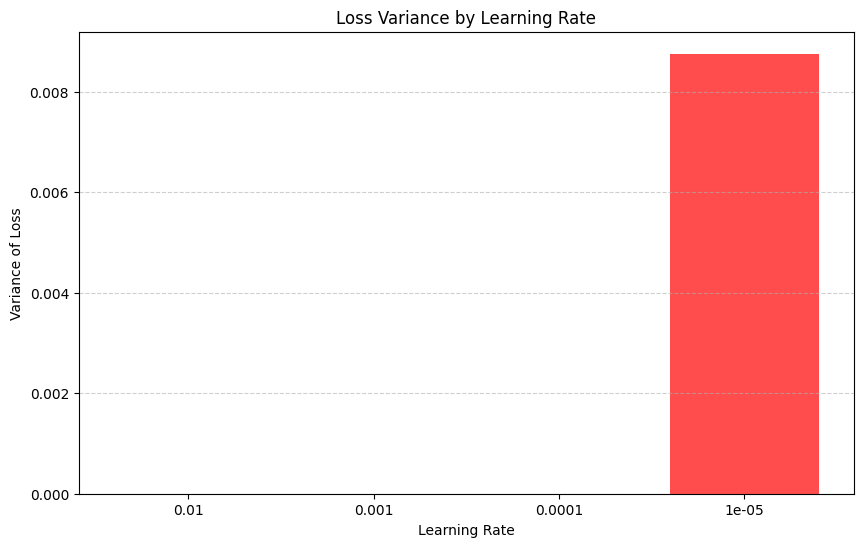

In [26]:
# Analyze the variance of each hyperparameter
# Group by activation function
act_fn_var = df.groupby("ActFn")["Loss"].var().sort_values()

# Group by width
width_var = df.groupby("Width")["Loss"].var().sort_index()

# Group by number of blocks
nblocks_var = df.groupby("NBlocks")["Loss"].var().sort_index()

# Group by learning rate
lr_var = df.groupby("LR")["Loss"].var().sort_index(ascending=False)
print(act_fn_var)
# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_var.index, act_fn_var, color="blue", alpha=0.7)
plt.title("Loss Variance by Activation Function")
plt.ylabel("Variance of Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_var.index, width_var, color="orange", alpha=0.7)
plt.title("Loss Variance by Model Width")
plt.ylabel("Variance of Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Number of Blocks
plt.figure(figsize=(10, 6))
plt.bar(nblocks_var.index, nblocks_var, color="green", alpha=0.7)
plt.title("Loss Variance by Number of Blocks")
plt.ylabel("Variance of Loss")
plt.xlabel("Number of Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_var.index.astype(str), lr_var, color="red", alpha=0.7)
plt.title("Loss Variance by Learning Rate")
plt.ylabel("Variance of Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


Interpretation:

Higher variance indicates that the hyperparameter leads to more inconsistent performance (less stable).
Lower variance suggests more stable behavior for the associated hyperparameter values.

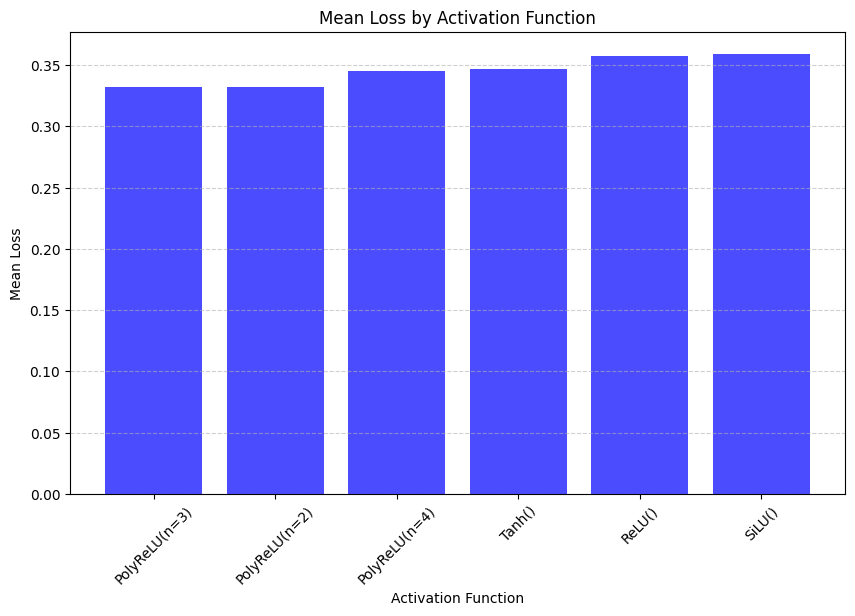

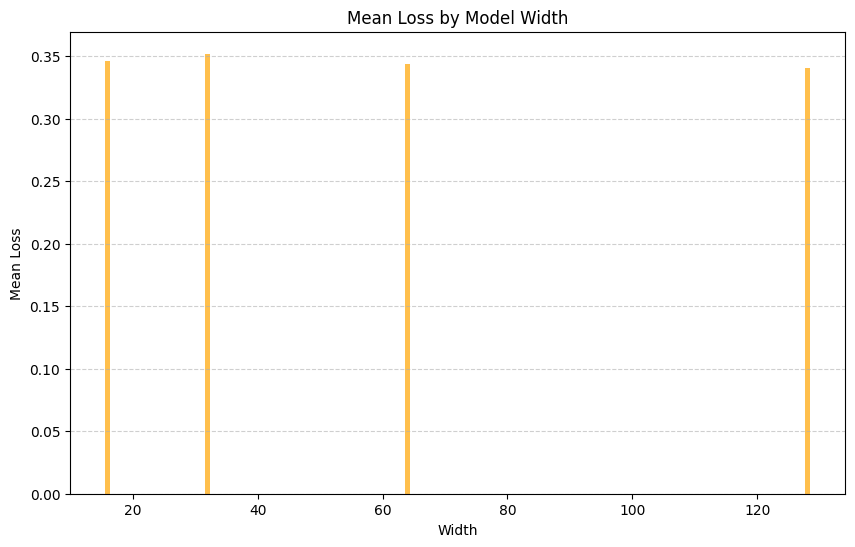

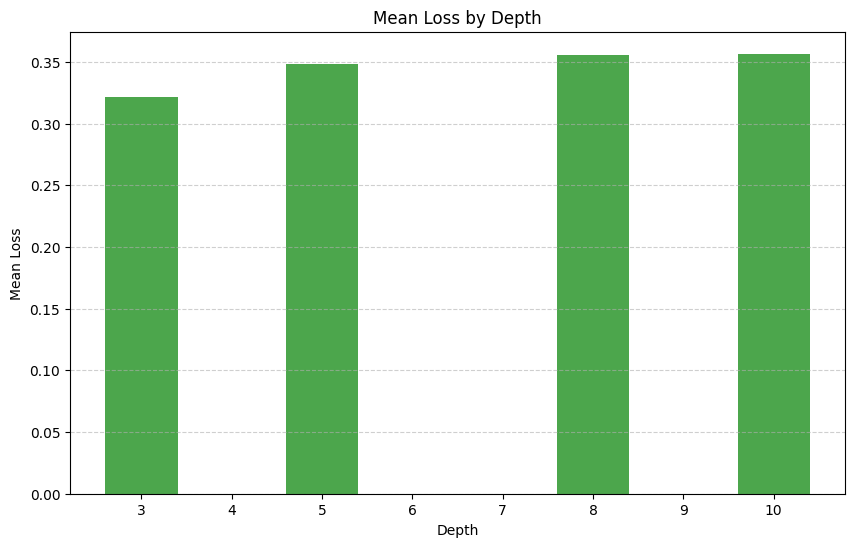

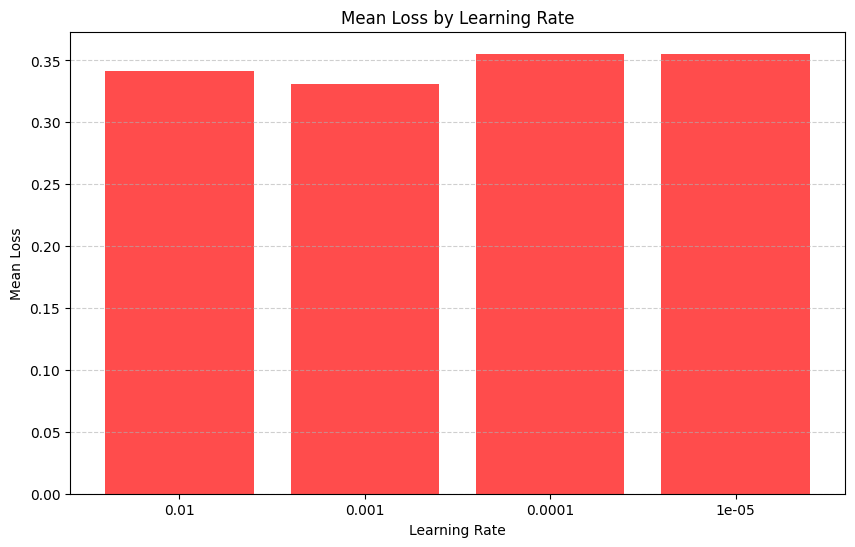

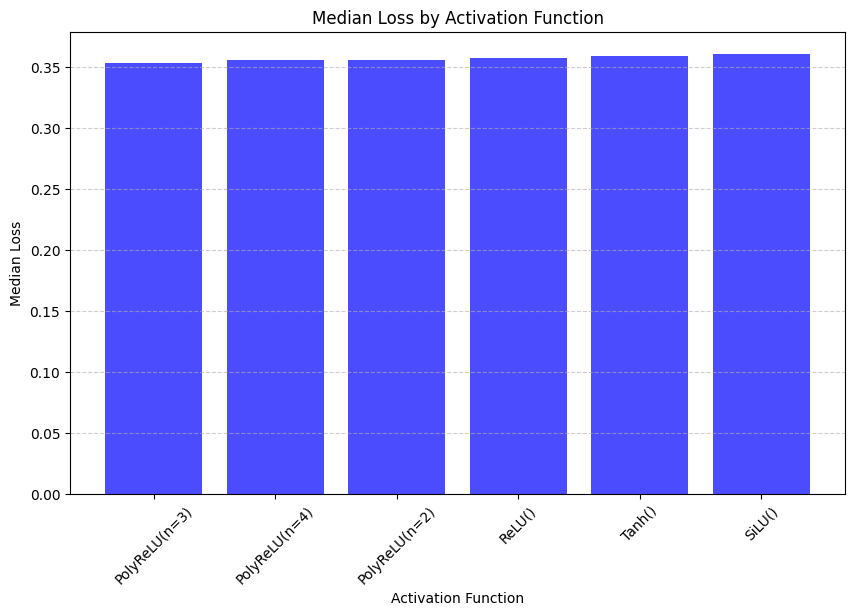

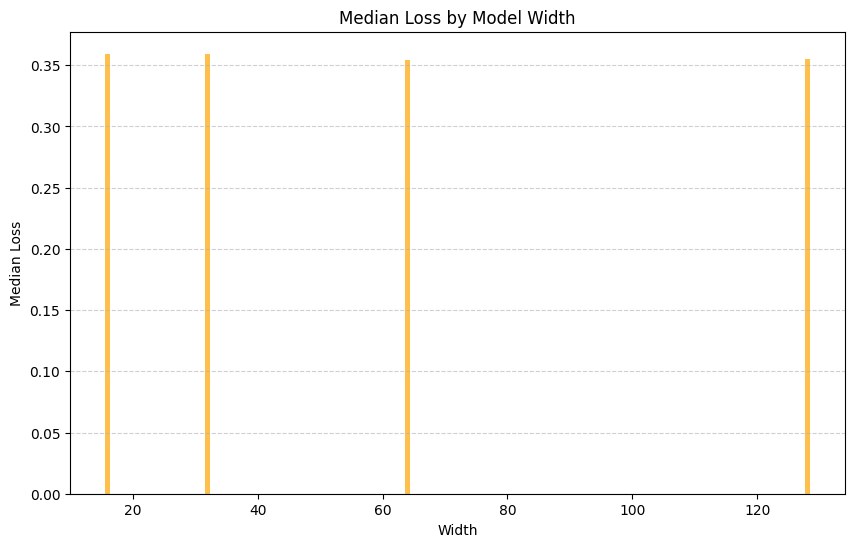

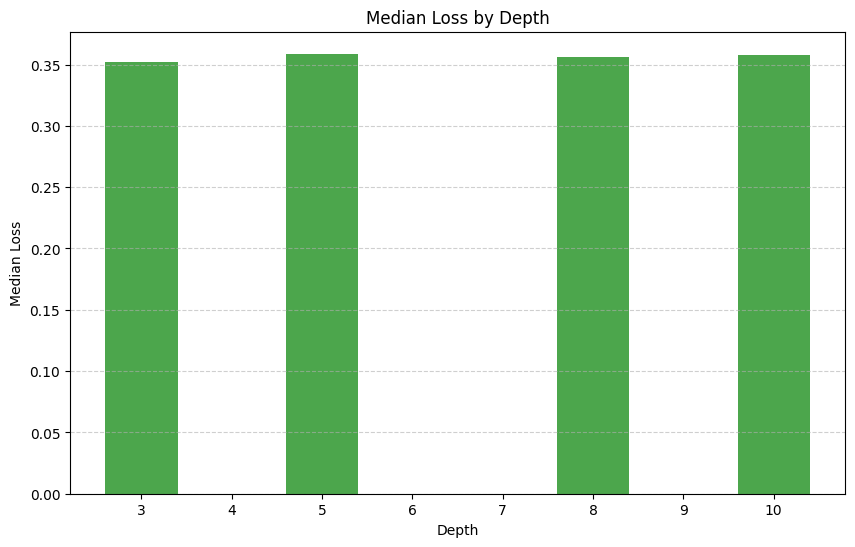

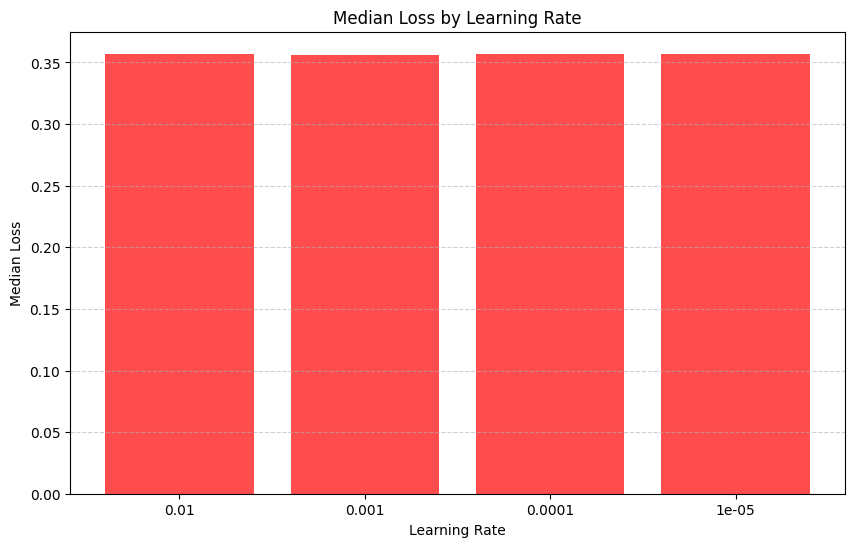

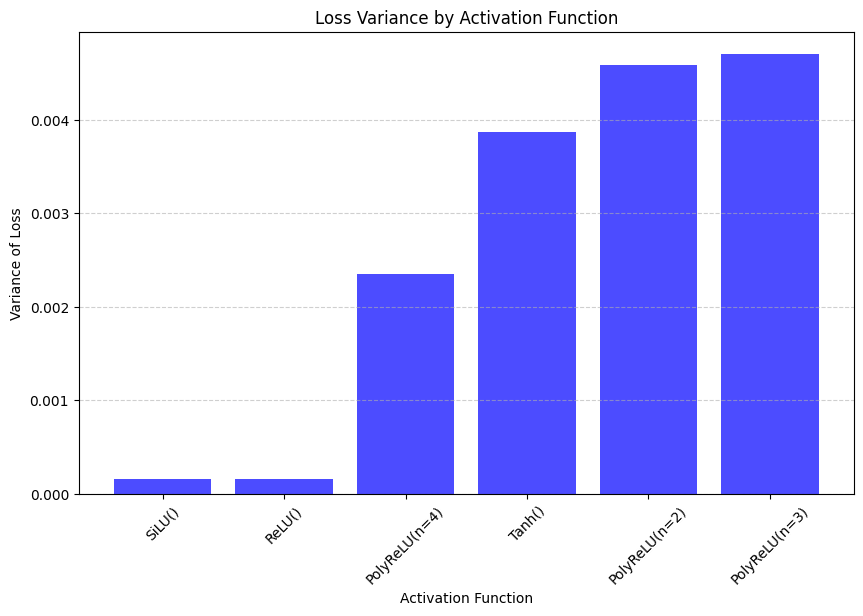

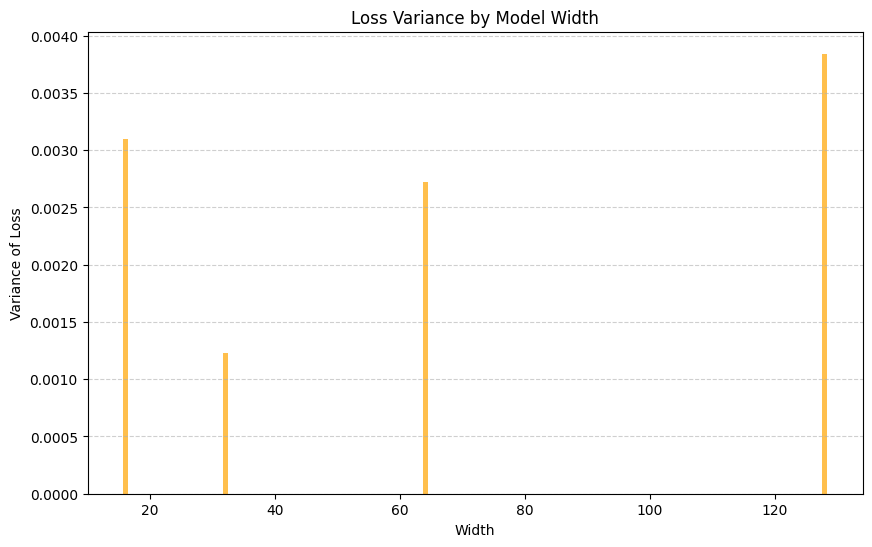

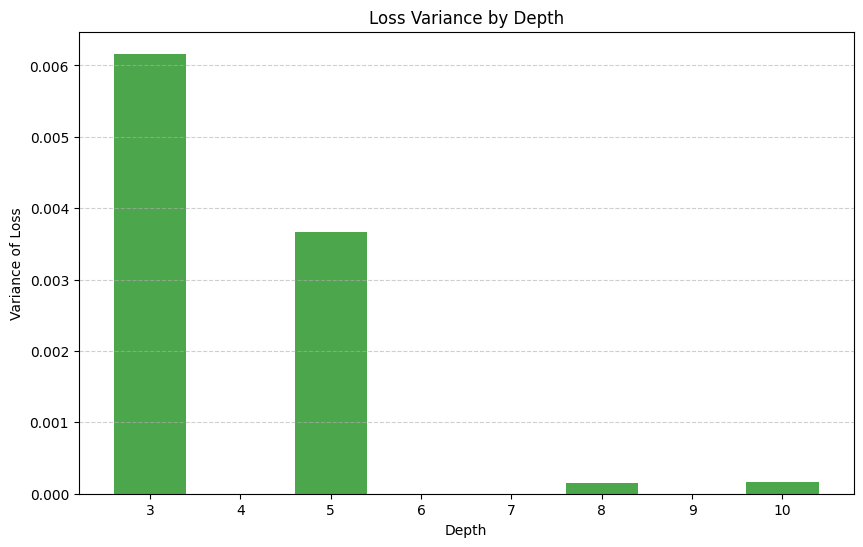

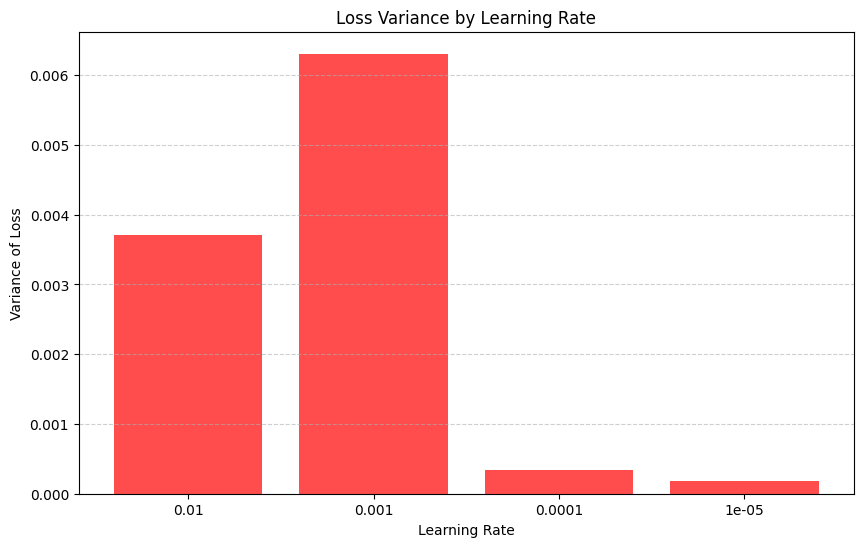

In [28]:

file_path = 'grid_search_results_pinn_2d_laplacian.txt'
df = parse_pinn_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_mean = df.groupby("ActFn")["Loss"].mean().sort_values()

# Group by width
width_mean = df.groupby("Width")["Loss"].mean().sort_index()

# Group by number of blocks
nblocks_mean = df.groupby("Depth")["Loss"].mean().sort_index()

# Group by learning rate
lr_mean = df.groupby("LR")["Loss"].mean().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_mean.index, act_fn_mean, color="blue", alpha=0.7)
plt.title("Mean Loss by Activation Function")
plt.ylabel("Mean Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_mean.index, width_mean, color="orange", alpha=0.7)
plt.title("Mean Loss by Model Width")
plt.ylabel("Mean Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(nblocks_mean.index, nblocks_mean, color="green", alpha=0.7)
plt.title("Mean Loss by Depth")
plt.ylabel("Mean Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_mean.index.astype(str), lr_mean, color="red", alpha=0.7)
plt.title("Mean Loss by Learning Rate")
plt.ylabel("Mean Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()
width_median = df.groupby("Width")["Loss"].median().sort_index()
depth_median = df.groupby("Depth")["Loss"].median().sort_index()
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(depth_median.index, depth_median, color="green", alpha=0.7)
plt.title("Median Loss by Depth")
plt.ylabel("Median Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

act_fn_var = df.groupby("ActFn")["Loss"].var().sort_values()
width_var = df.groupby("Width")["Loss"].var().sort_index()
depth_var = df.groupby("Depth")["Loss"].var().sort_index()
lr_var = df.groupby("LR")["Loss"].var().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_var.index, act_fn_var, color="blue", alpha=0.7)
plt.title("Loss Variance by Activation Function")
plt.ylabel("Variance of Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_var.index, width_var, color="orange", alpha=0.7)
plt.title("Loss Variance by Model Width")
plt.ylabel("Variance of Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(depth_var.index, depth_var, color="green", alpha=0.7)
plt.title("Loss Variance by Depth")
plt.ylabel("Variance of Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_var.index.astype(str), lr_var, color="red", alpha=0.7)
plt.title("Loss Variance by Learning Rate")
plt.ylabel("Variance of Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()



In [ ]:
file_path = 'grid_search_results_pinn_problem5.txt'
df = parse_pinn_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("Depth")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Depth")
plt.ylabel("Median Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


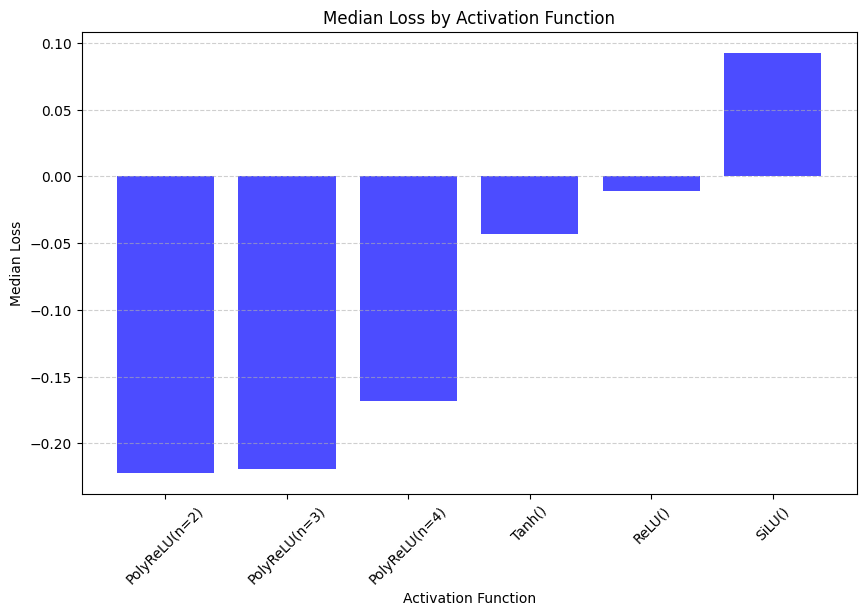

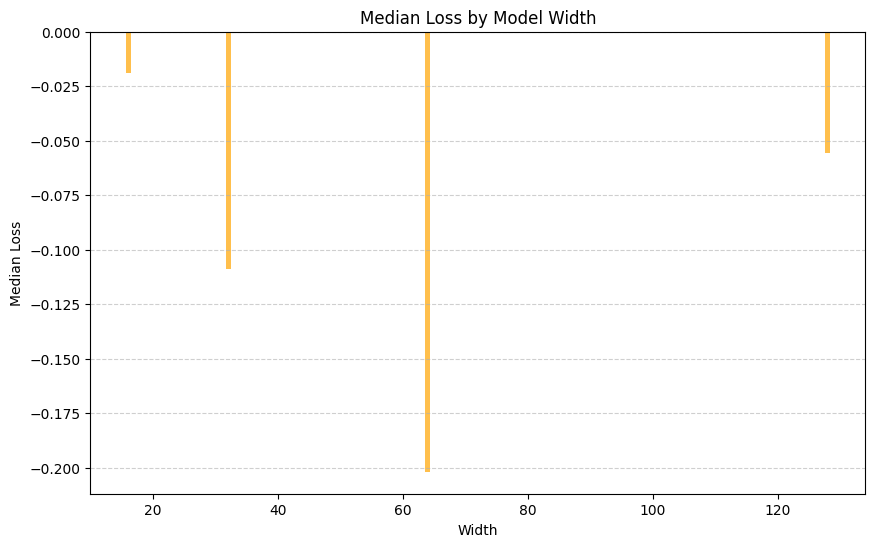

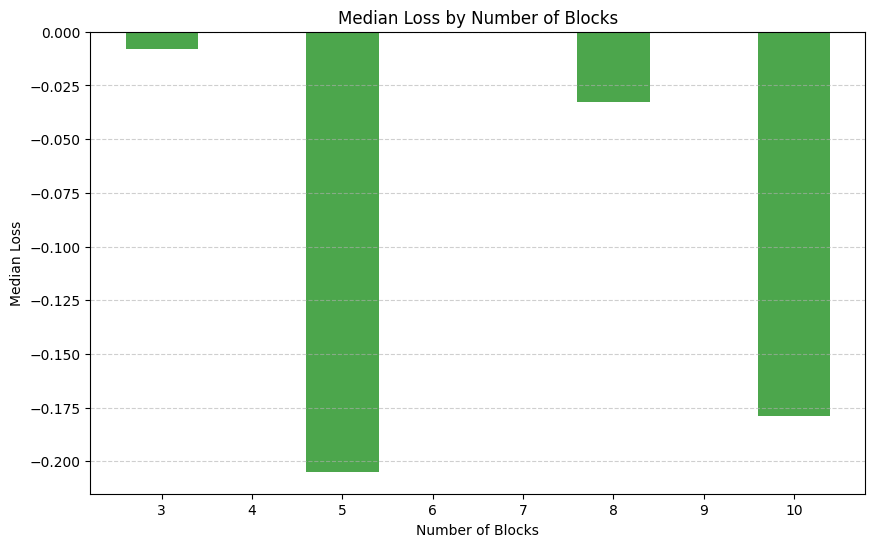

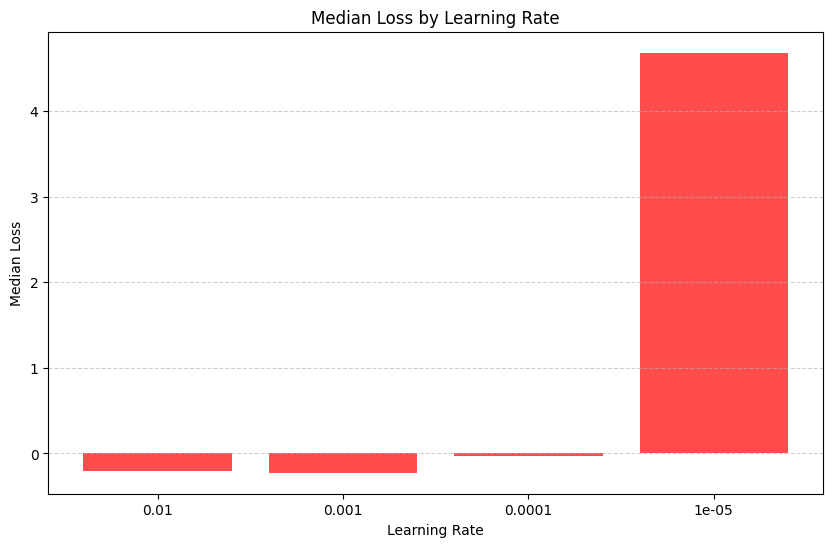

In [11]:
file_path = 'random_search_results_drm_problem5.txt'
df = parse_drm_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("NBlocks")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Number of Blocks
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Number of Blocks")
plt.ylabel("Median Loss")
plt.xlabel("Number of Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


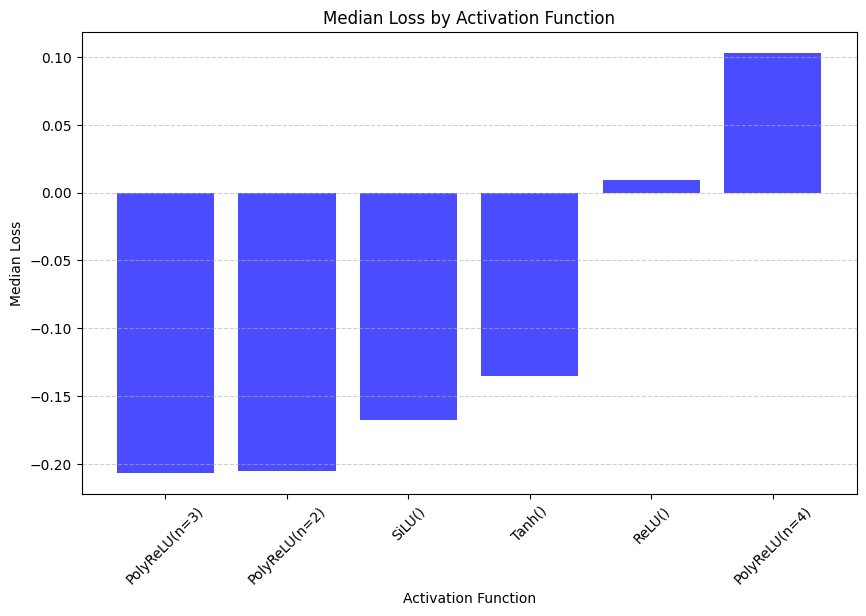

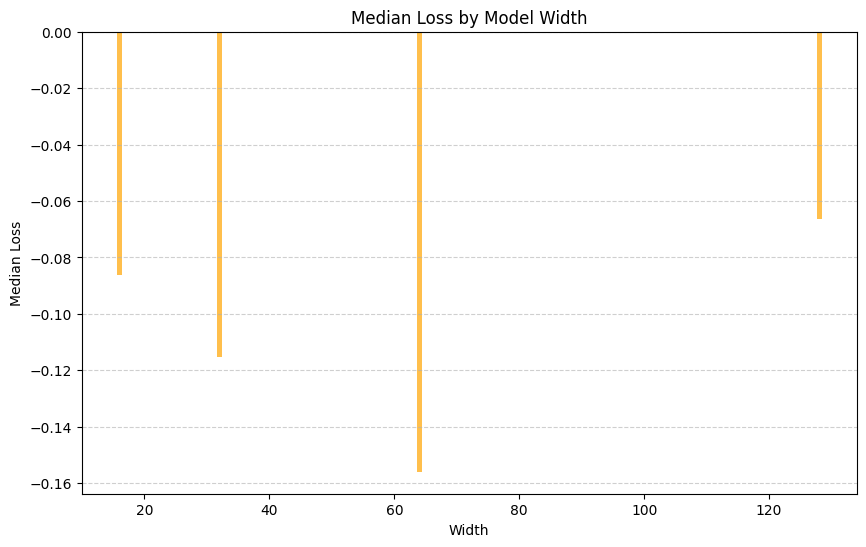

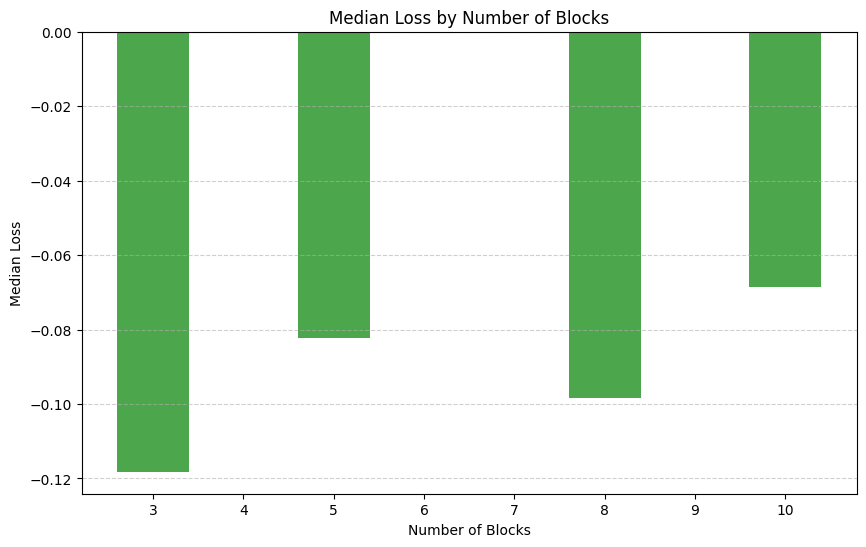

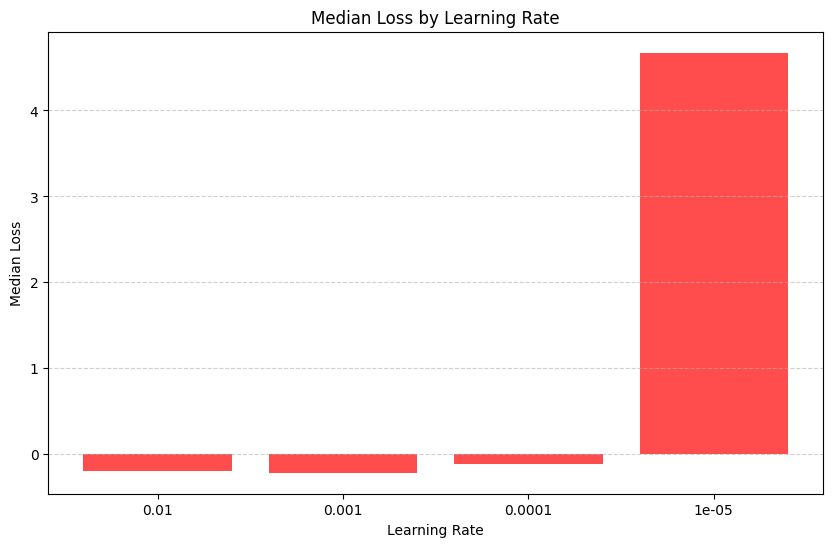

In [14]:
file_path = 'grid_search_results_drm_problem5.txt'
df = parse_drm_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("NBlocks")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Number of Blocks
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Number of Blocks")
plt.ylabel("Median Loss")
plt.xlabel("Number of Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

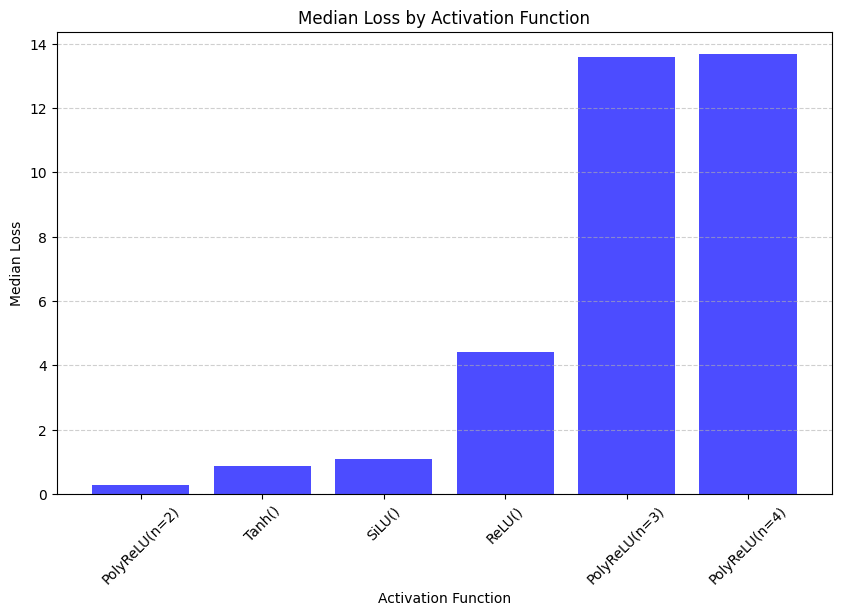

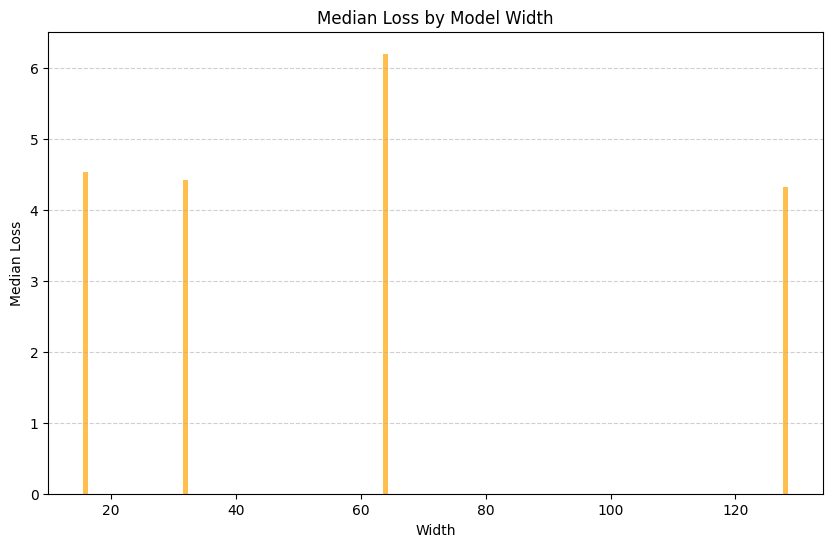

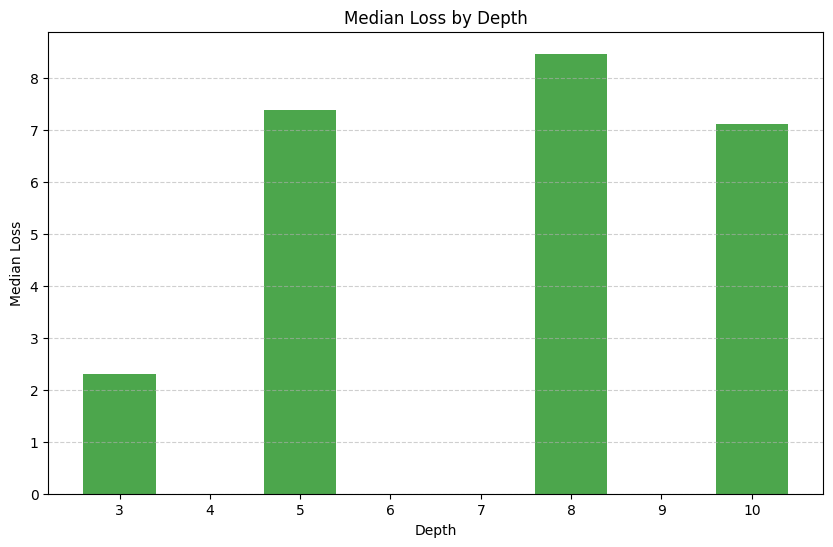

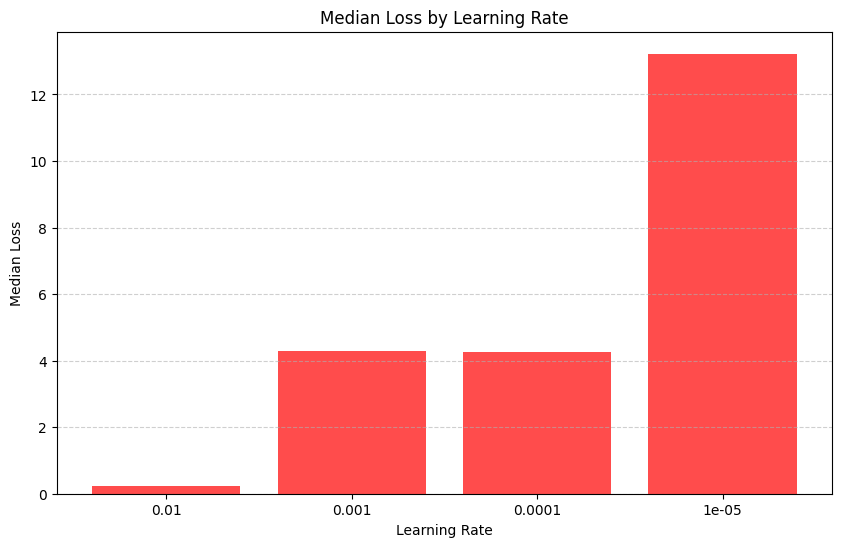

In [12]:
file_path = 'random_search_results_pinn_problem5.txt'
df = parse_pinn_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("Depth")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Depth")
plt.ylabel("Median Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


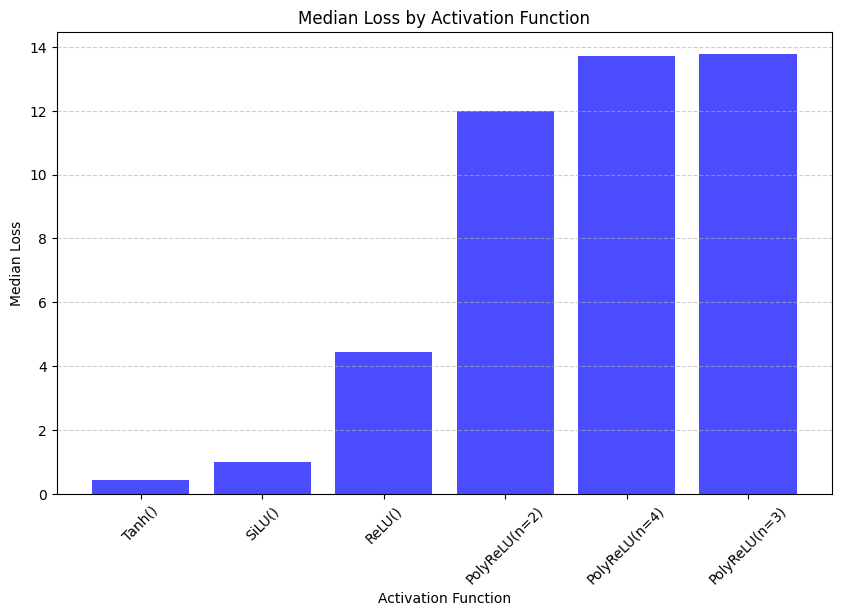

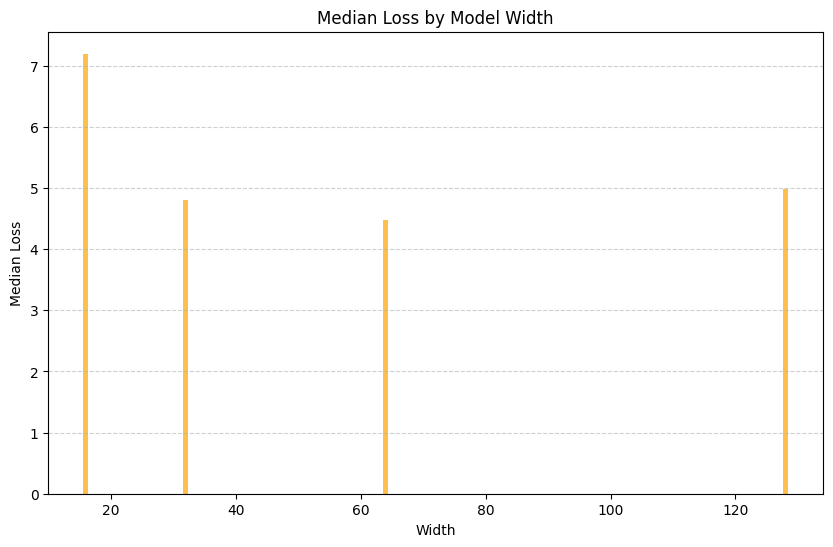

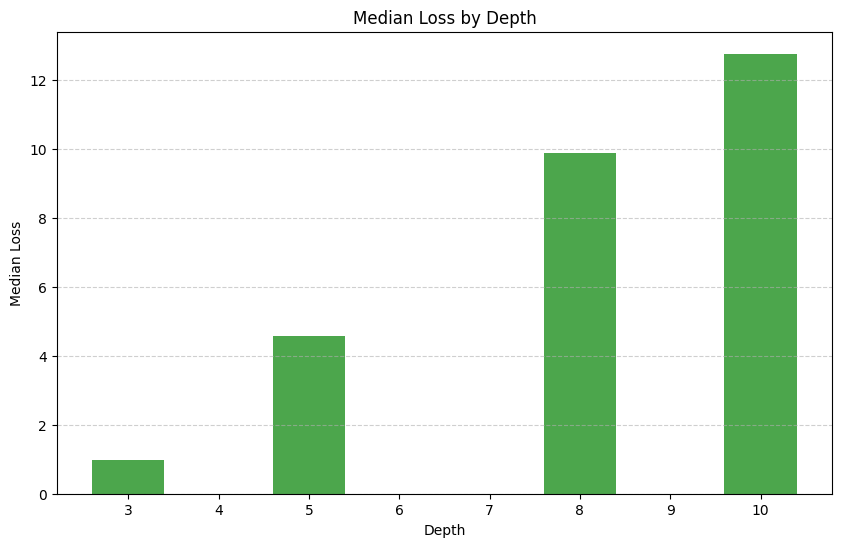

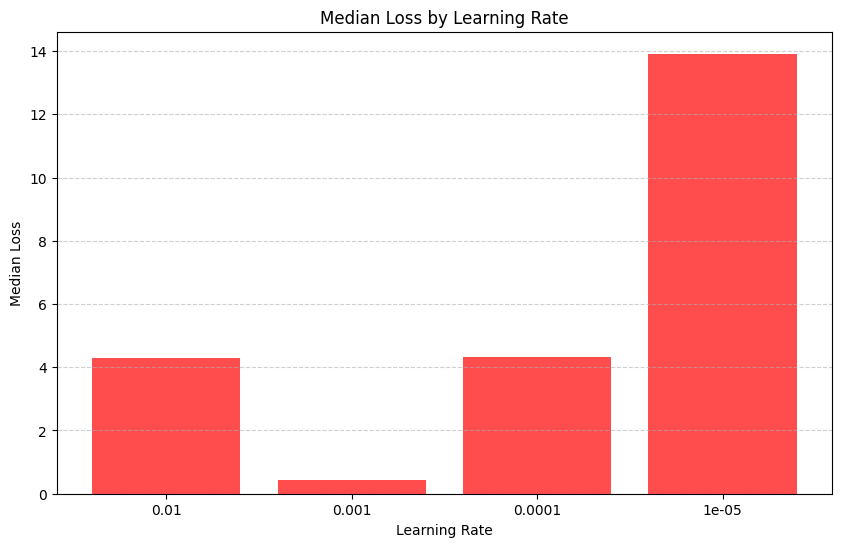

In [15]:
file_path = 'grid_search_results_pinn_problem5.txt'
df = parse_pinn_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("Depth")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Depth")
plt.ylabel("Median Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


    Rank      Loss          ActFn  Width  Depth       LR
0      1  0.002036  PolyReLU(n=2)     64     10  0.00010
1      2  0.002256  PolyReLU(n=2)    128     10  0.00100
2      3  0.002640         ReLU()    128     10  0.00010
3      4  0.003507         ReLU()     32      3  0.00100
4      5  0.003514         SiLU()     64      8  0.00100
..   ...       ...            ...    ...    ...      ...
95    96       inf  PolyReLU(n=3)    128      5  0.00001
96    97       inf  PolyReLU(n=3)    128     10  0.01000
97    98       inf  PolyReLU(n=3)     16     10  0.00010
98    99       inf  PolyReLU(n=2)     64     10  0.01000
99   100       inf  PolyReLU(n=4)     16     10  0.00100

[100 rows x 6 columns]
LR
0.00001    inf
0.00010    inf
0.00100    inf
0.01000    inf
Name: Loss, dtype: float64


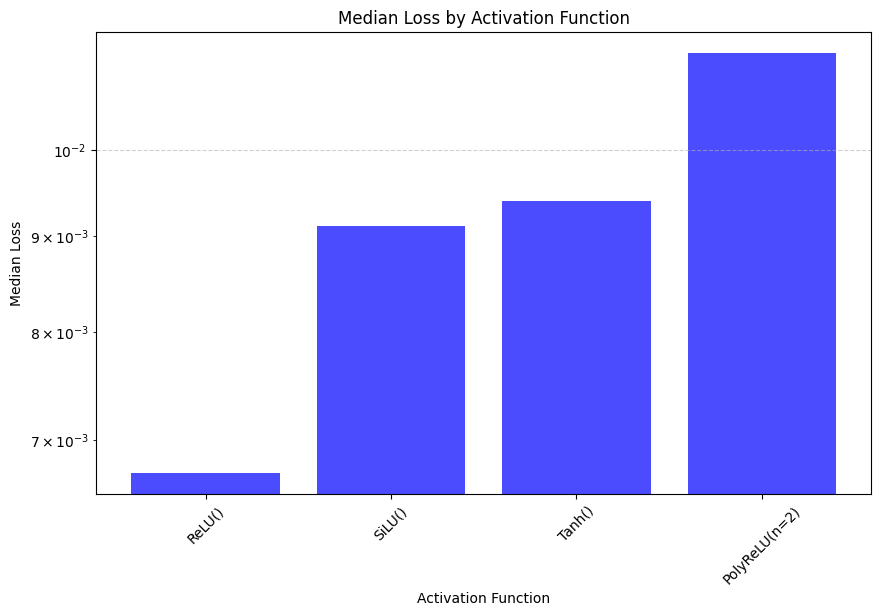

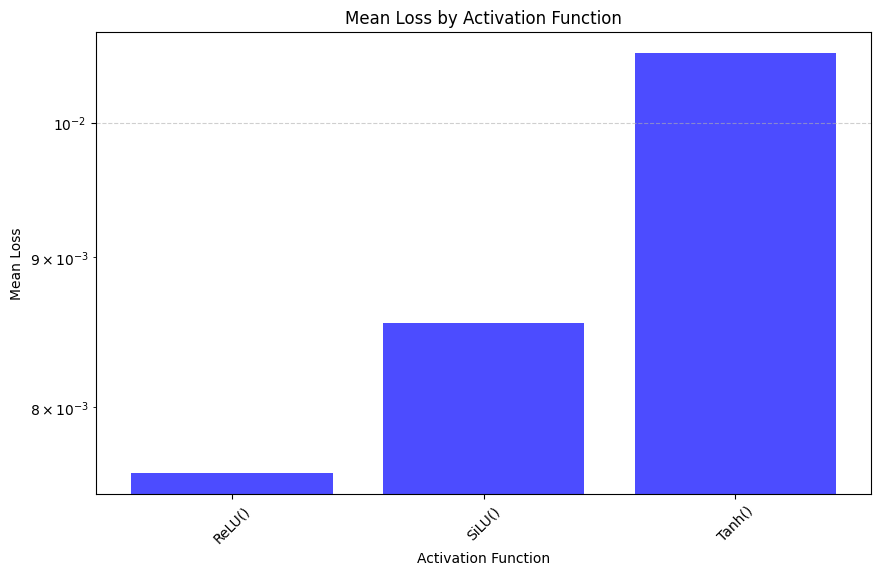

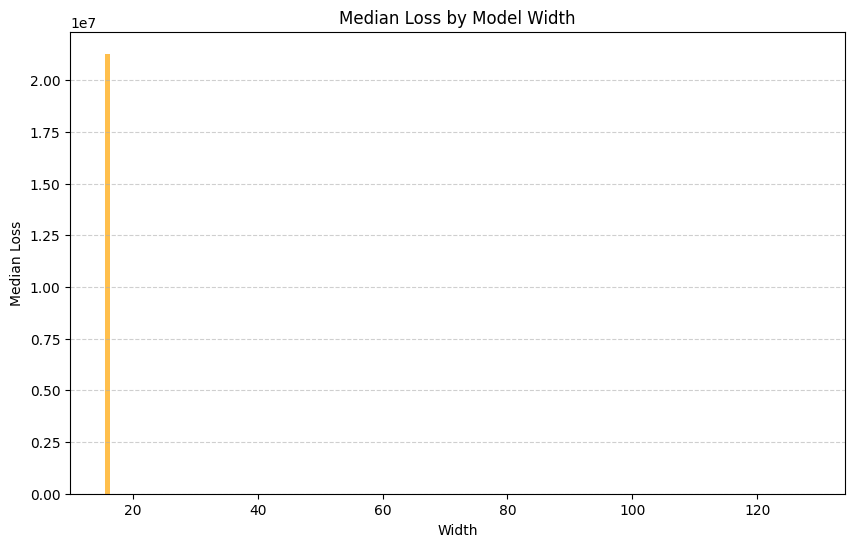

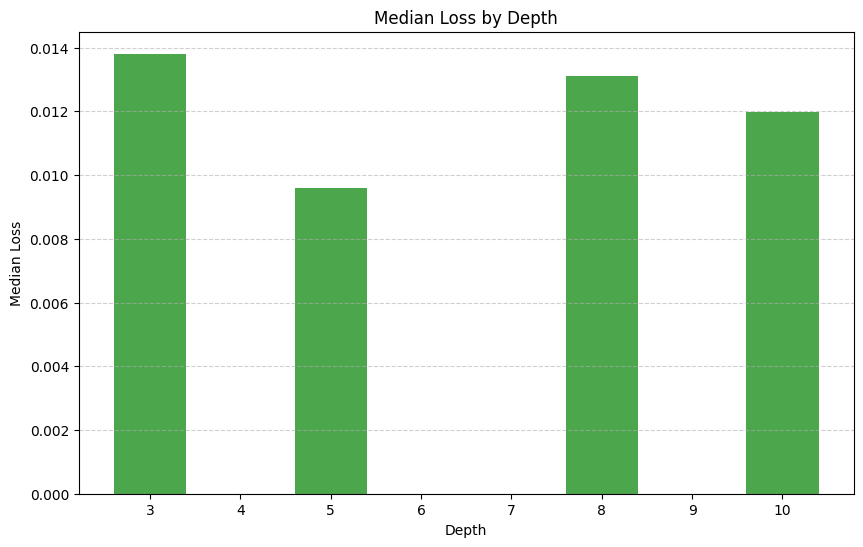

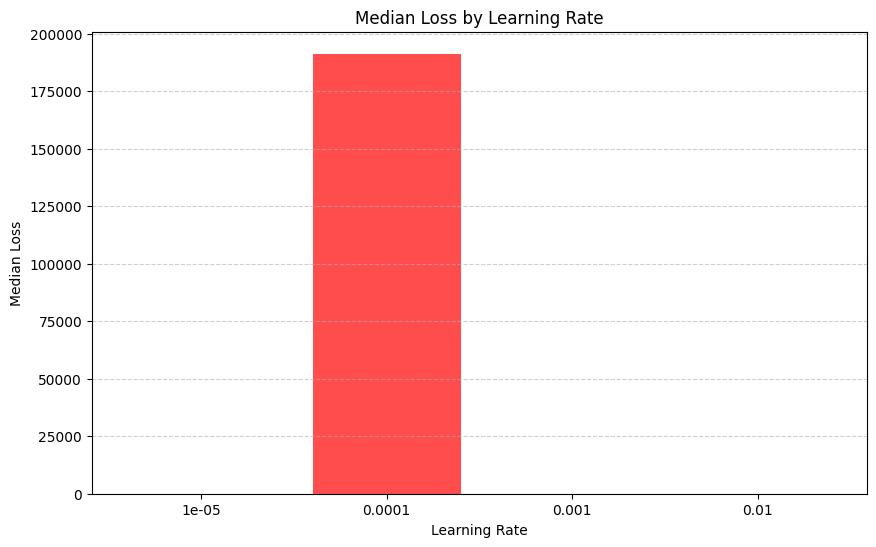

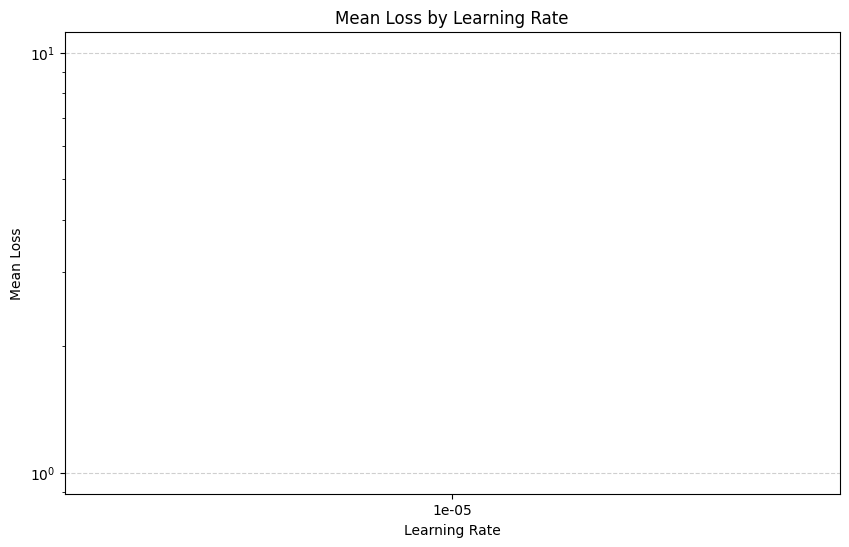

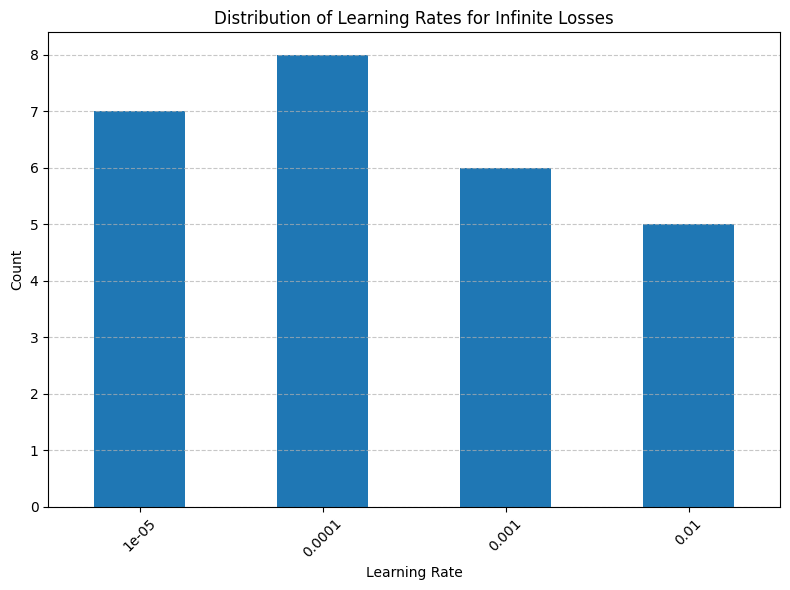

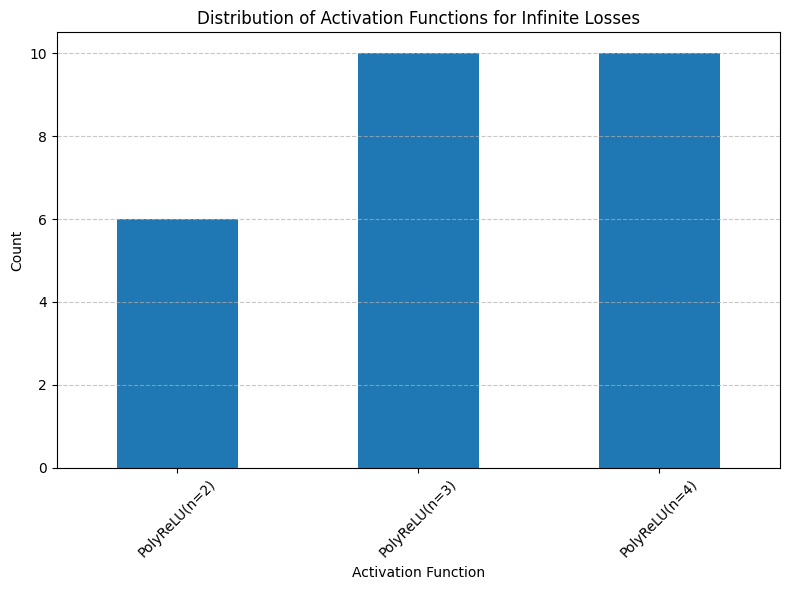

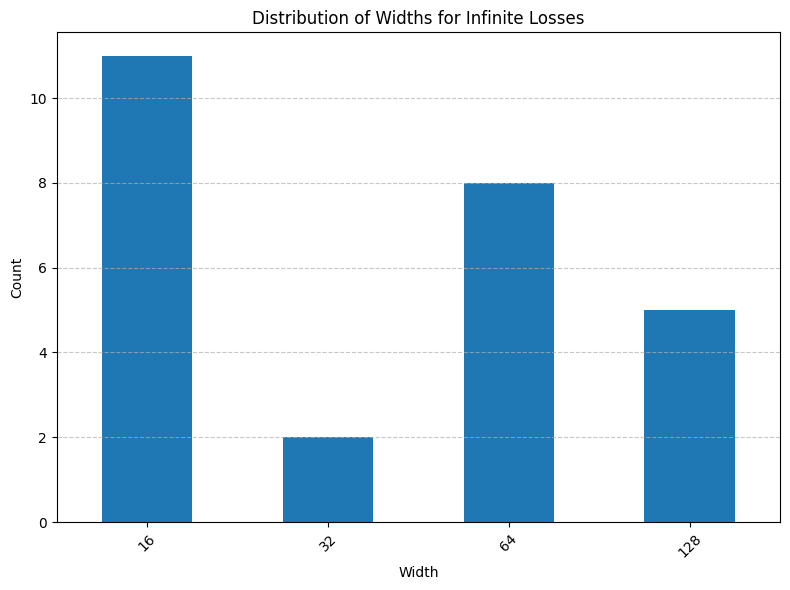

In [13]:
file_path = 'random_search_results_pinn_2d_wave.txt'
df = parse_pinn_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()
act_fn_mean = df.groupby("ActFn")["Loss"].mean().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("Depth")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index()
lr_mean = df.groupby("LR")["Loss"].mean().sort_index()

print(df)
print(lr_mean)
# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Activation Function mean loss log scale
plt.figure(figsize=(10, 6))
plt.bar(act_fn_mean.index, act_fn_mean, color="blue", alpha=0.7)
plt.title("Mean Loss by Activation Function")
plt.ylabel("Mean Loss")
plt.xlabel("Activation Function")
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Depth")
plt.ylabel("Median Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate mean loss log scale
plt.figure(figsize=(10, 6))
plt.bar(lr_mean.index.astype(str), lr_mean, color="red", alpha=0.7)
plt.title("Mean Loss by Learning Rate")
plt.ylabel("Mean Loss")
plt.xlabel("Learning Rate")
plt.yscale('log')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Filter rows where Loss is np.inf
inf_loss_df = df[df["Loss"] == np.inf]

# Plot the distribution of learning rates
plt.figure(figsize=(8, 6))
inf_loss_df['LR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Learning Rate')
plt.ylabel('Count')
plt.title('Distribution of Learning Rates for Infinite Losses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the distribution of activation functions
plt.figure(figsize=(8, 6))
inf_loss_df['ActFn'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Activation Function')
plt.ylabel('Count')
plt.title('Distribution of Activation Functions for Infinite Losses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the distribution of widths
plt.figure(figsize=(8, 6))
inf_loss_df['Width'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Distribution of Widths for Infinite Losses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

     Rank      Loss          ActFn  Width  Depth       LR
0       1  0.001754  PolyReLU(n=3)     16      5  0.01000
1       2  0.001826         ReLU()     32      5  0.01000
2       3  0.002898         Tanh()    128     10  0.00100
3       4  0.002909         ReLU()     32      8  0.00010
4       5  0.003035         SiLU()     64      5  0.00001
..    ...       ...            ...    ...    ...      ...
379   380       inf  PolyReLU(n=4)    128      8  0.00001
380   381       inf  PolyReLU(n=4)    128     10  0.01000
381   382       inf  PolyReLU(n=4)    128     10  0.00100
382   383       inf  PolyReLU(n=4)    128     10  0.00010
383   384       inf  PolyReLU(n=4)    128     10  0.00001

[384 rows x 6 columns]
LR
0.00001    inf
0.00010    inf
0.00100    inf
0.01000    inf
Name: Loss, dtype: float64


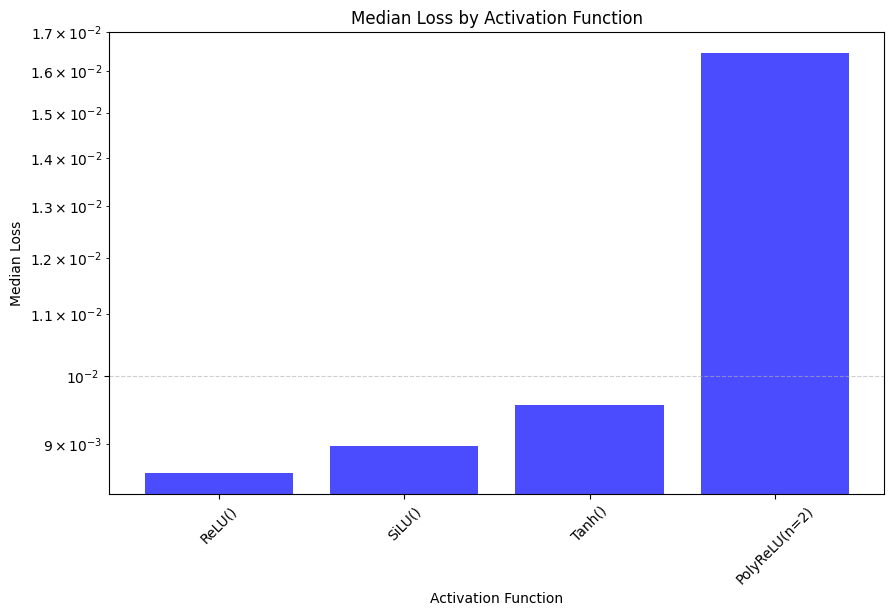

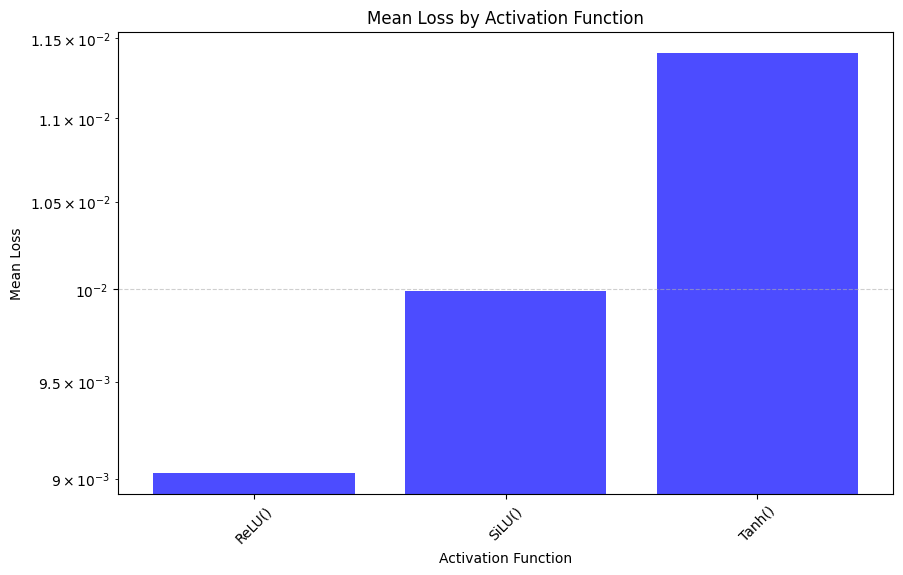

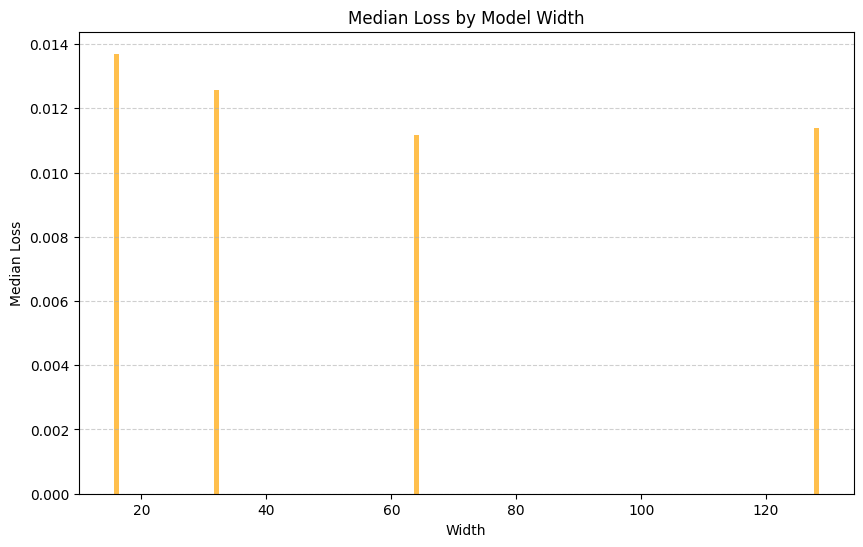

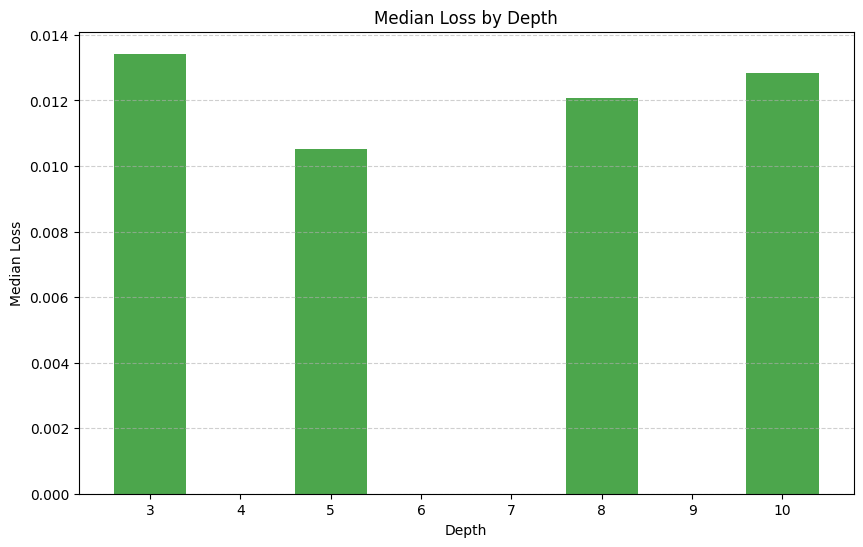

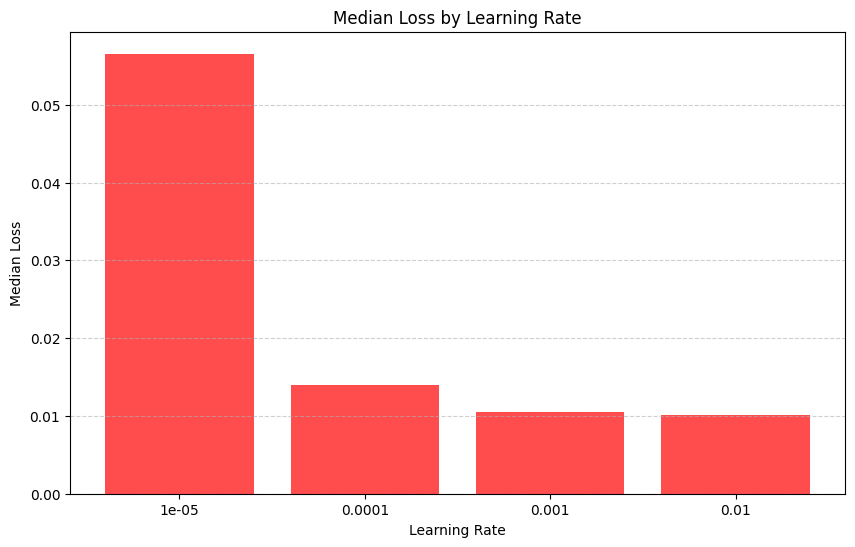

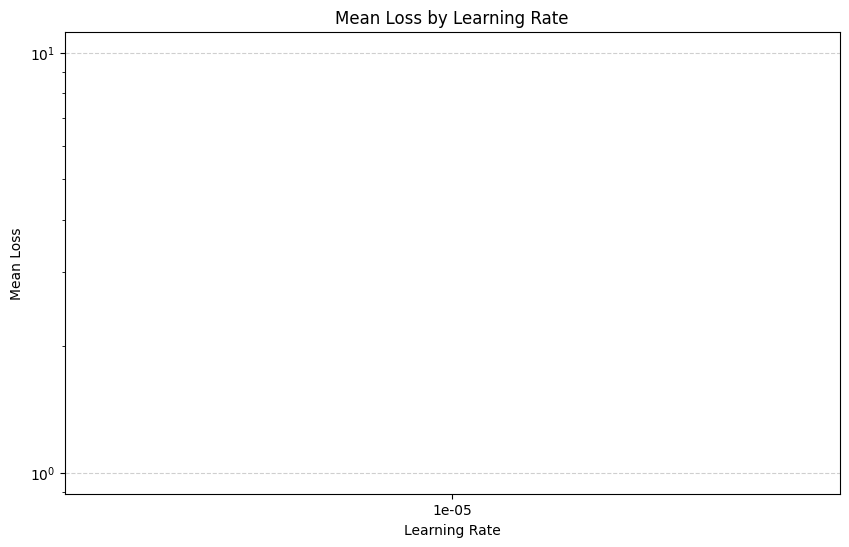

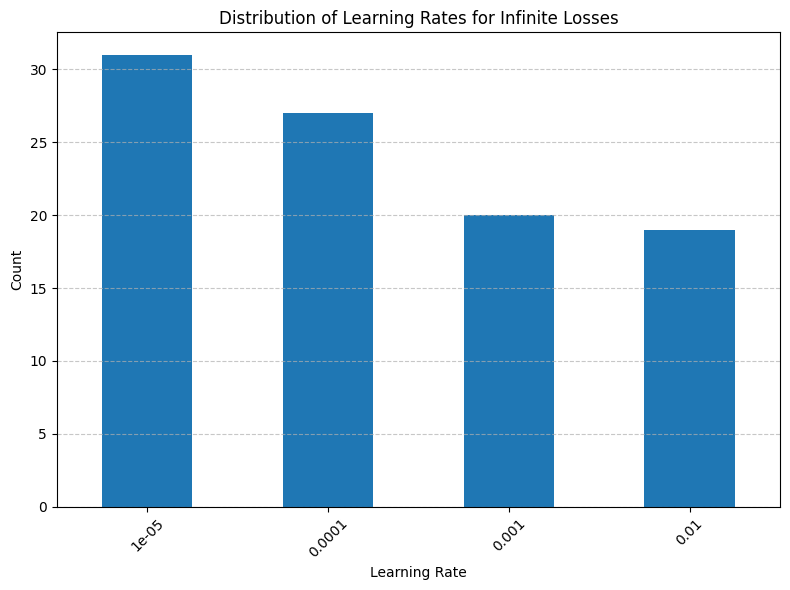

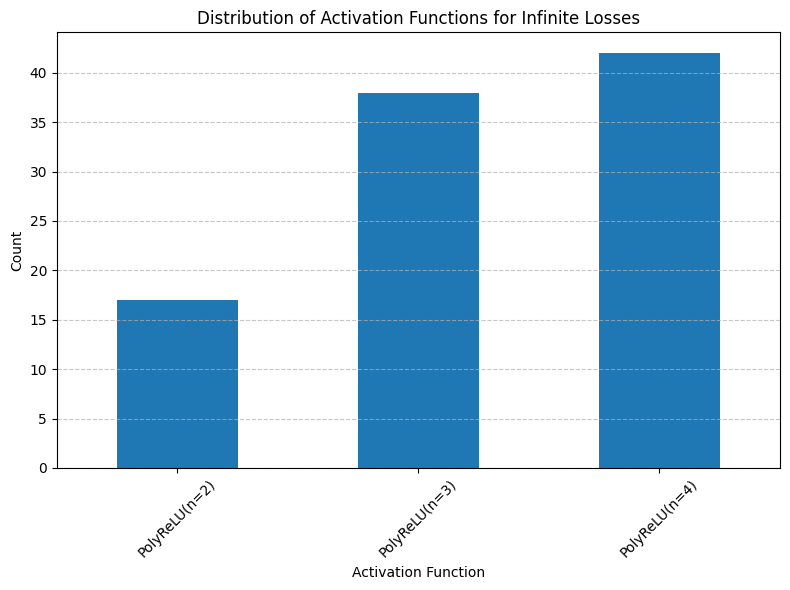

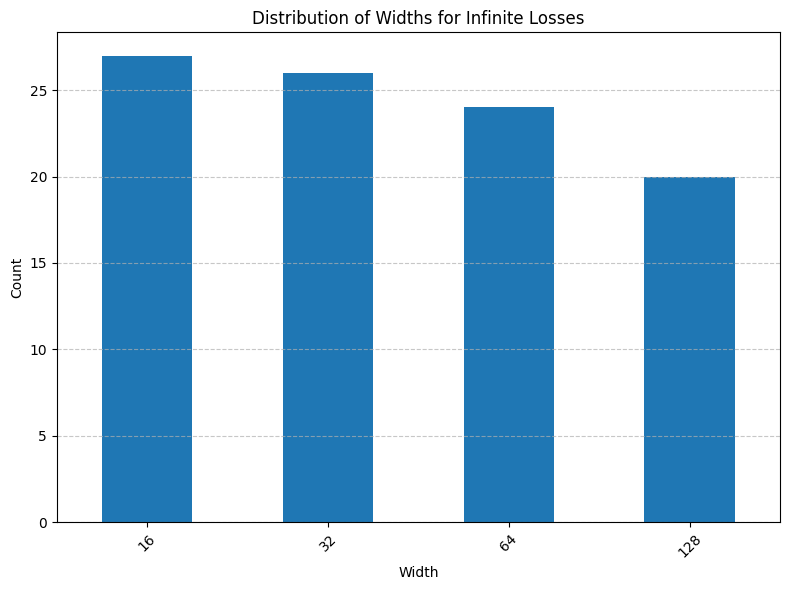

In [18]:
file_path = 'grid_search_results_pinn_2d_wave.txt'
df = parse_pinn_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()
act_fn_mean = df.groupby("ActFn")["Loss"].mean().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("Depth")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index()
lr_mean = df.groupby("LR")["Loss"].mean().sort_index()

print(df)
print(lr_mean)
# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Activation Function mean loss log scale
plt.figure(figsize=(10, 6))
plt.bar(act_fn_mean.index, act_fn_mean, color="blue", alpha=0.7)
plt.title("Mean Loss by Activation Function")
plt.ylabel("Mean Loss")
plt.xlabel("Activation Function")
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Depth")
plt.ylabel("Median Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate mean loss log scale
plt.figure(figsize=(10, 6))
plt.bar(lr_mean.index.astype(str), lr_mean, color="red", alpha=0.7)
plt.title("Mean Loss by Learning Rate")
plt.ylabel("Mean Loss")
plt.xlabel("Learning Rate")
plt.yscale('log')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Filter rows where Loss is np.inf
inf_loss_df = df[df["Loss"] == np.inf]

# Plot the distribution of learning rates
plt.figure(figsize=(8, 6))
inf_loss_df['LR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Learning Rate')
plt.ylabel('Count')
plt.title('Distribution of Learning Rates for Infinite Losses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the distribution of activation functions
plt.figure(figsize=(8, 6))
inf_loss_df['ActFn'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Activation Function')
plt.ylabel('Count')
plt.title('Distribution of Activation Functions for Infinite Losses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the distribution of widths
plt.figure(figsize=(8, 6))
inf_loss_df['Width'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Distribution of Widths for Infinite Losses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()